In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from sklearn import svm
%matplotlib inline
import os
from matplotlib import*
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')

X = dataset.iloc[:, :2]
X2 = dataset.iloc[:,[1,2]].values
y = dataset.iloc[:, 4].values
X1 = dataset.drop('Trustable',axis=1)

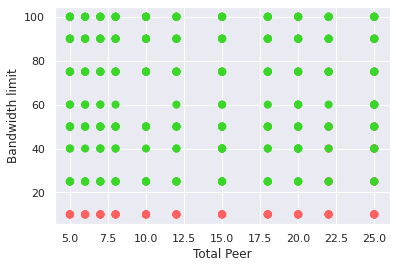

In [45]:

plt.xlabel('Total Peer')
plt.ylabel('Bandwidth limit')
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
#plt.scatter(x=X[Y==0,0], y=X[Y==0,1],color="green",marker='+',s=50)
#plt.scatter(x=X[Y==1,0],y=X[Y==1,1],color="blue",marker='.',s=50)
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 2], c=y, s=50, cmap=cm_dark)
#plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

In [46]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C= 1)
model.fit(X, y)

SVC(C=1, kernel='linear')

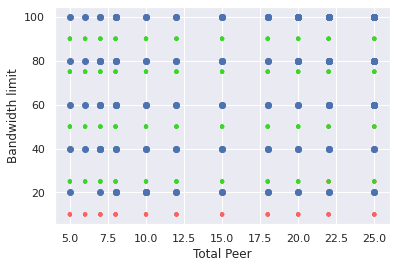

In [47]:
plt.xlabel('Total Peer')
plt.ylabel('Bandwidth limit')
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 2], c=y, s=10, cmap=cm_dark)
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

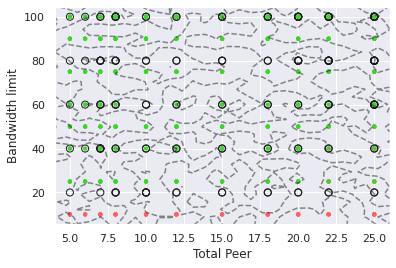

In [48]:
plt.xlabel('Total Peer')
plt.ylabel('Bandwidth limit')
ax = plt.gca()
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 2], c=y, s=10, cmap=cm_dark)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

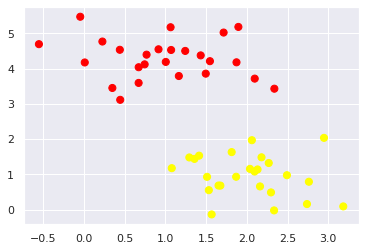

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

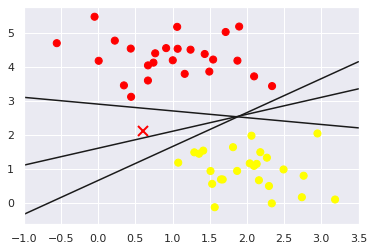

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);


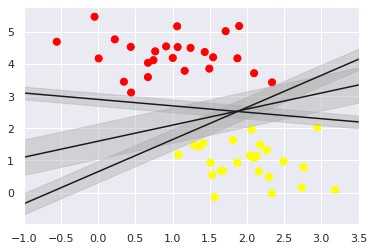

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [11]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

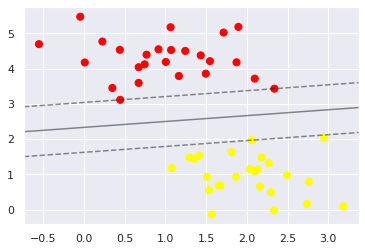

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);